# Loan Approval Prediction

## Task: The goal for this competition is to predict whether an applicant is approved for a loan.

## Evaluation: Submissions are evaluated using the Area under ROC Cruve.

In [232]:
# pip install matplotlib


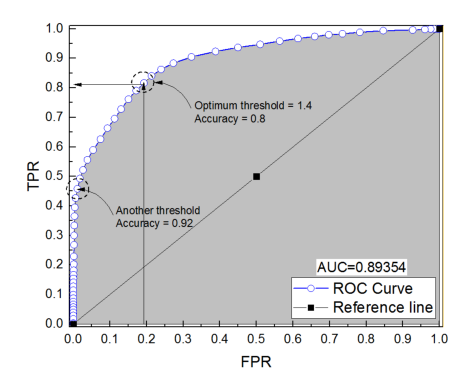

In [233]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Use double backslashes or raw string for file path
Eval_Metric = mpimg.imread(r"C:\Users\abudh\Desktop\Loan_Approval\Evalaution Metric.png")

# Display the image
plt.imshow(Eval_Metric)
plt.axis('off')  # Optionally hide the axis
plt.show()


In [234]:
# pip install pandas numpy matplotlib seaborn scikit-learn xgboost catboost


In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from matplotlib.patches import ConnectionPatch

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [236]:
df_train = pd.read_csv(r"C:\Users\abudh\Desktop\Loan_Approval\train.csv")
df_test = pd.read_csv(r"C:\Users\abudh\Desktop\Loan_Approval\test.csv")
df_sub = pd.read_csv(r"C:\Users\abudh\Desktop\Loan_Approval\sample_submission.csv")

In [237]:
df_origi = pd.read_csv(r"C:\Users\abudh\Desktop\Loan_Approval\credit_risk_dataset.csv")
df_origi.head()

person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4

In [238]:
df_origi.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [239]:
df_origi.shape    

(32581, 12)

In [240]:
df_train.columns
df_train.head()

id  person_age  person_income person_home_ownership  person_emp_length  \
0   0          37          35000                  RENT                0.0   
1   1          22          56000                   OWN                6.0   
2   2          29          28800                   OWN                8.0   
3   3          30          70000                  RENT               14.0   
4   4          22          60000                  RENT                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0   EDUCATION          B       6000          11.49                 0.17   
1     MEDICAL          C       4000          13.35                 0.07   
2    PERSONAL          A       6000           8.90                 0.21   
3     VENTURE          B      12000          11.11                 0.17   
4     MEDICAL          A       6000           6.92                 0.10   

  cb_person_default_on_file  cb_person_cred_hist_length  loan_status  
0                         N                          14            0  
1                         N                           2            0  
2                         N                          10            0  
3                         N                           5            0  
4                         N                           3            0

In [241]:
df_train.describe()


id    person_age  person_income  person_emp_length  \
count  58645.000000  58645.000000   5.864500e+04       58645.000000   
mean   29322.000000     27.550857   6.404617e+04           4.701015   
std    16929.497605      6.033216   3.793111e+04           3.959784   
min        0.000000     20.000000   4.200000e+03           0.000000   
25%    14661.000000     23.000000   4.200000e+04           2.000000   
50%    29322.000000     26.000000   5.800000e+04           4.000000   
75%    43983.000000     30.000000   7.560000e+04           7.000000   
max    58644.000000    123.000000   1.900000e+06         123.000000   

          loan_amnt  loan_int_rate  loan_percent_income  \
count  58645.000000   58645.000000         58645.000000   
mean    9217.556518      10.677874             0.159238   
std     5563.807384       3.034697             0.091692   
min      500.000000       5.420000             0.000000   
25%     5000.000000       7.880000             0.090000   
50%     8000.000000      10.750000             0.140000   
75%    12000.000000      12.990000             0.210000   
max    35000.000000      23.220000             0.830000   

       cb_person_cred_hist_length   loan_status  
count                58645.000000  58645.000000  
mean                     5.813556      0.142382  
std                      4.029196      0.349445  
min                      2.000000      0.000000  
25%                      3.000000      0.000000  
50%                      4.000000      0.000000  
75%                      8.000000      0.000000  
max                     30.000000      1.000000

In [242]:
df_test.head()


id  person_age  person_income person_home_ownership  person_emp_length  \
0  58645          23          69000                  RENT                3.0   
1  58646          26          96000              MORTGAGE                6.0   
2  58647          26          30000                  RENT                5.0   
3  58648          33          50000                  RENT                4.0   
4  58649          26         102000              MORTGAGE                8.0   

         loan_intent loan_grade  loan_amnt  loan_int_rate  \
0    HOMEIMPROVEMENT          F      25000          15.76   
1           PERSONAL          C      10000          12.68   
2            VENTURE          E       4000          17.19   
3  DEBTCONSOLIDATION          A       7000           8.90   
4    HOMEIMPROVEMENT          D      15000          16.32   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.36                         N                           2  
1                 0.10                         Y                           4  
2                 0.13                         Y                           2  
3                 0.14                         N                           7  
4                 0.15                         Y                           4

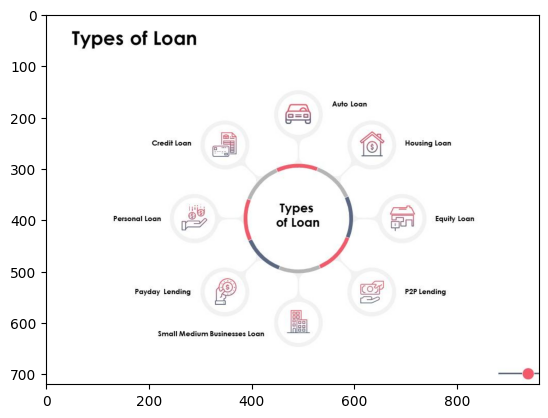

In [243]:
Type_of_loan = mpimg.imread(r"C:\Users\abudh\Desktop\Loan_Approval\Type_of_Load.jpg")
plt.imshow(Type_of_loan)
plt.show()

In [244]:
df_sub.head()

id  loan_status
0  58645          0.5
1  58646          0.5
2  58647          0.5
3  58648          0.5
4  58649          0.5

In [245]:
print(df_train.columns)
print(df_test.columns)
print(df_origi.columns)

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')
Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')
Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')


In [246]:
df_train = df_train.drop(columns = ["id"])
df_test = df_test.drop(columns = ["id"])

In [247]:
df_train.shape,df_test.shape


((58645, 12), (39098, 11))

In [248]:
df_train = pd.concat([df_train,df_origi],axis=0)


In [249]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 91226 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  91226 non-null  int64  
 1   person_income               91226 non-null  int64  
 2   person_home_ownership       91226 non-null  object 
 3   person_emp_length           90331 non-null  float64
 4   loan_intent                 91226 non-null  object 
 5   loan_grade                  91226 non-null  object 
 6   loan_amnt                   91226 non-null  int64  
 7   loan_int_rate               88110 non-null  float64
 8   loan_percent_income         91226 non-null  float64
 9   cb_person_default_on_file   91226 non-null  object 
 10  cb_person_cred_hist_length  91226 non-null  int64  
 11  loan_status                 91226 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 9.0+ MB


In [250]:
df_train.isnull().sum()


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
loan_status                      0
dtype: int64

In [251]:
df_test.isnull().sum()


person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [252]:
"""  
rows_with_missing = df_train[df_train.isnull().any(axis=1)].shape[0]
total_rows = df_train.shape[0]
print(f"Number of rows with missing data: {rows_with_missing}")
print(f"Total number of rows: {total_rows}")

df_train = df_train.dropna()
"""



df_train['person_emp_length'].fillna(df_train['person_emp_length'].mean(), inplace=True)
df_train['loan_int_rate'].fillna(df_train['loan_int_rate'].mean(), inplace=True)

rows_with_missing = df_train[df_train.isnull().any(axis=1)].shape[0]
total_rows = df_train.shape[0]
print(f"Number of rows with missing data: {rows_with_missing}")
print(f"Total number of rows: {total_rows}")

Number of rows with missing data: 0
Total number of rows: 91226


C:\Users\abudh\AppData\Local\Temp\ipykernel_18696\3505551271.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['person_emp_length'].fillna(df_train['person_emp_length'].mean(), inplace=True)
C:\Users\abudh\AppData\Local\Temp\ipykernel_18696\3505551271.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

The dataset comprises predominantly younger borrowers with moderate income levels. There are indications of potential outliers in the fields of age, employment length, and income. The majority of loans are classified as small to moderate, typically carrying interest rates in the range of 8% to 13%. Notably, approximately 14.2% of the loans in the dataset result in defaults, which may offer valuable insights for assessing default risk. Additionally, the dataset contains a limited number of categorical features, and no missing data is present.








## Exploratory Data Analysis


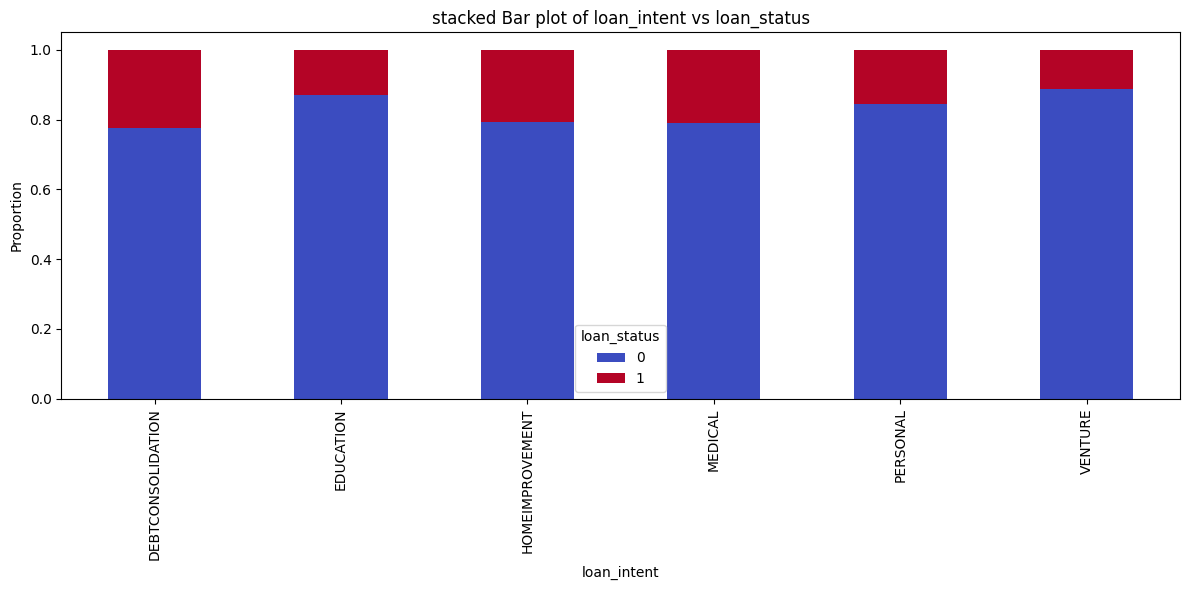

In [253]:
def stacked_bar_plot(df, feature, target='loan_status'):
    crosstab = pd.crosstab(df[feature], df[target], normalize = 'index')
    ax = crosstab.plot(kind= 'bar', stacked = True, figsize =(12,6), cmap='coolwarm')
    
    plt.title (f'stacked Bar plot of {feature} vs {target}')
    plt.ylabel('Proportion')
    plt.xlabel(feature)
    plt.tight_layout()
    plt.show()
    
stacked_bar_plot(df_train, 'loan_intent')



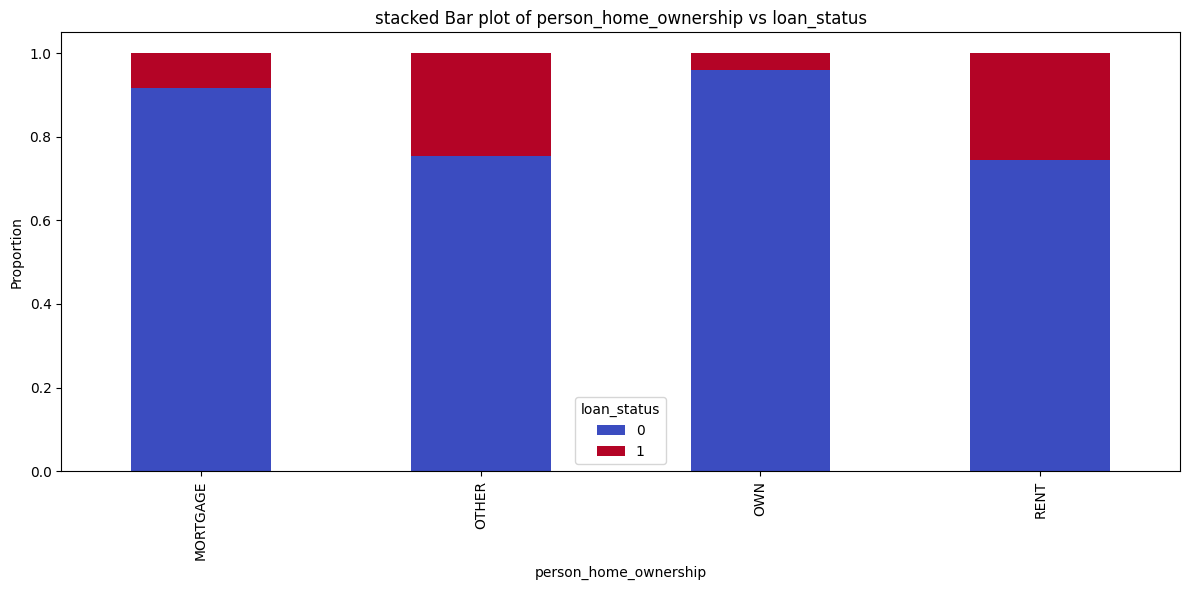

In [254]:
stacked_bar_plot(df_train, 'person_home_ownership')


C:\Users\abudh\AppData\Local\Temp\ipykernel_18696\602785759.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x='person_home_ownership', palette= "coolwarm")


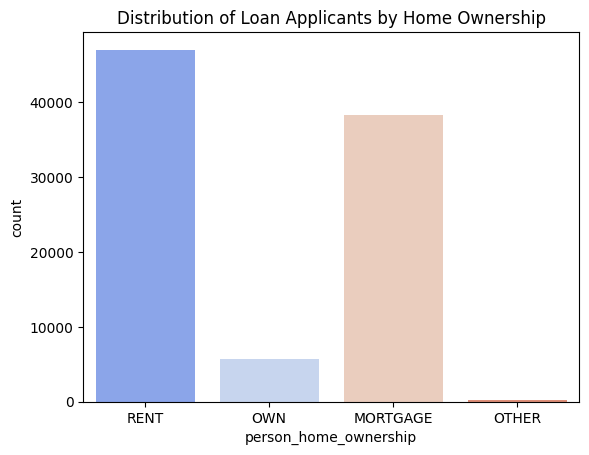

In [255]:
sns.countplot(data=df_train, x='person_home_ownership', palette= "coolwarm")
plt.title('Distribution of Loan Applicants by Home Ownership')
plt.show()

C:\Users\abudh\AppData\Local\Temp\ipykernel_18696\1827645218.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x='loan_intent', palette= "coolwarm")


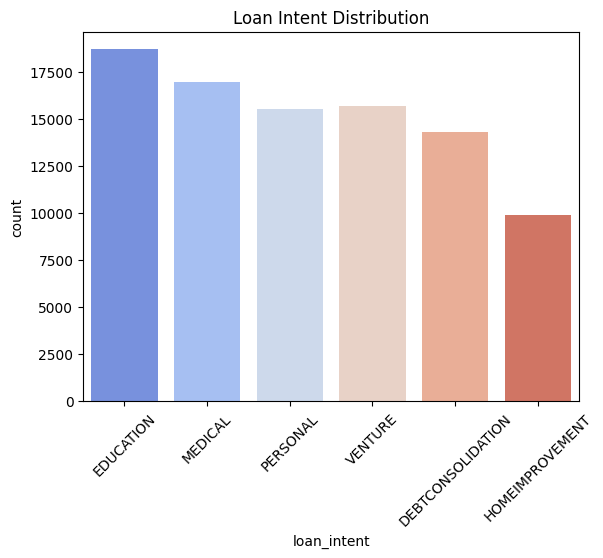

In [256]:
sns.countplot(data=df_train, x='loan_intent', palette= "coolwarm")
plt.title('Loan Intent Distribution')
plt.xticks(rotation=45)
plt.show()

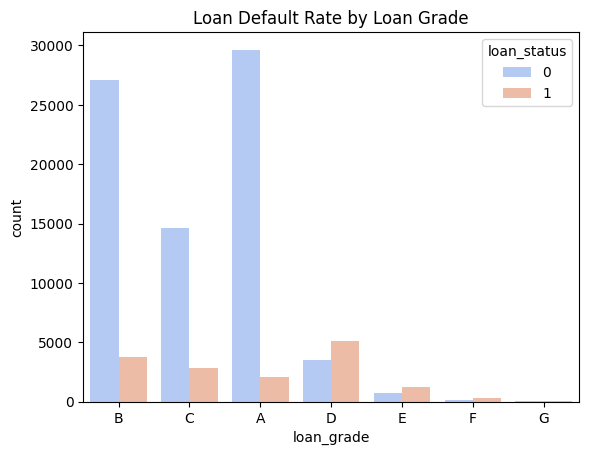

In [257]:
sns.countplot(data=df_train, x='loan_grade', hue='loan_status', palette= "coolwarm")
plt.title('Loan Default Rate by Loan Grade')
plt.show()

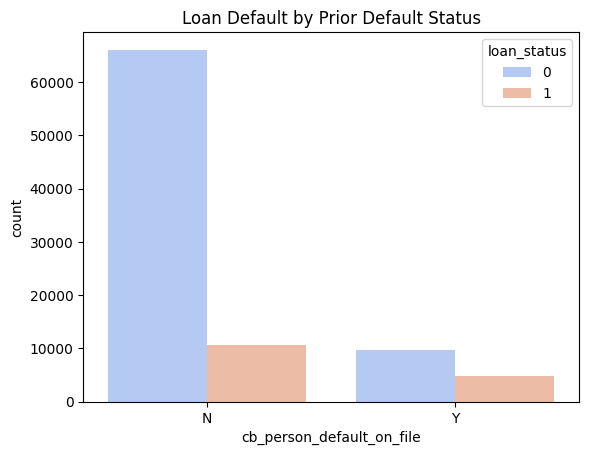

In [258]:
sns.countplot(data=df_train, x='cb_person_default_on_file', hue='loan_status',palette= "coolwarm")
plt.title('Loan Default by Prior Default Status')
plt.show()

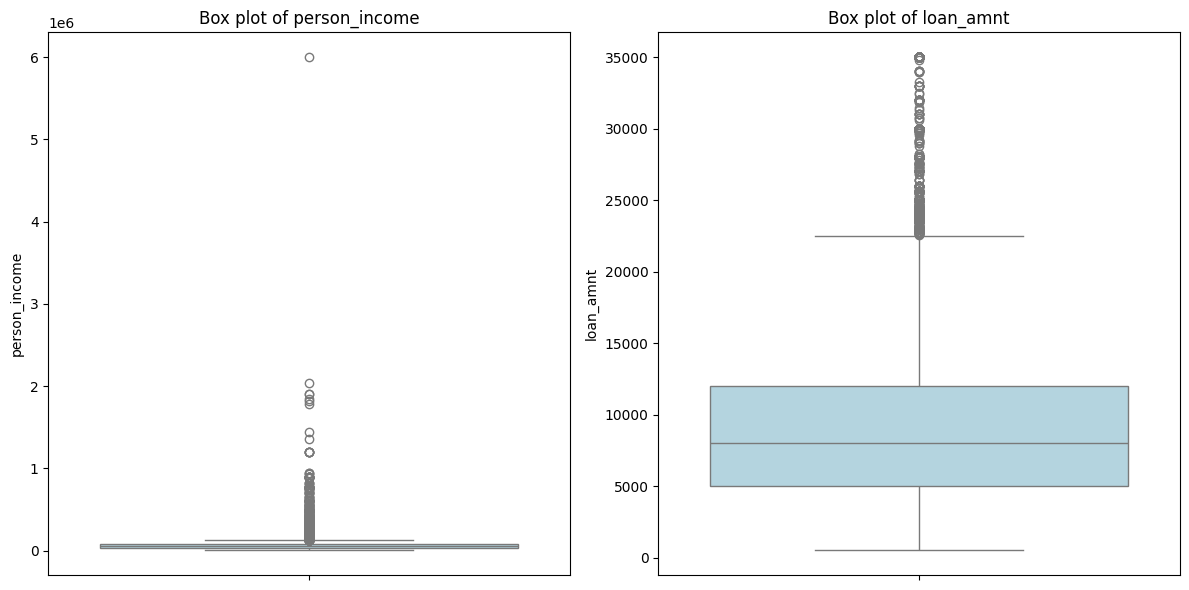

In [259]:
def  plot_boxplots(df, columns):
    plt.figure(figsize = (12,6))
    for i, col in enumerate(columns, 1):
        plt.subplot(1, len(columns), i)
        sns.boxplot(y= df[col], color = 'lightblue')
        plt.title(f'Box plot of {col}')
    plt.tight_layout()
    plt.show()

plot_boxplots(df_train, ['person_income', 'loan_amnt'])

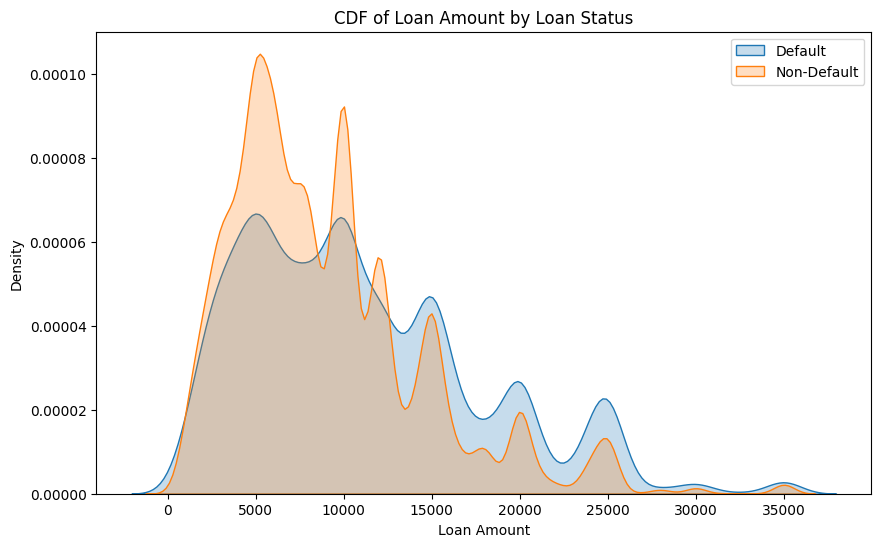

In [260]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df_train[df_train['loan_status'] == 1]['loan_amnt'], label='Default', fill=True)
sns.kdeplot(df_train[df_train['loan_status'] == 0]['loan_amnt'], label='Non-Default', fill=True)
plt.title('CDF of Loan Amount by Loan Status')
plt.xlabel('Loan Amount')
plt.ylabel('Density')
plt.legend()
plt.show()

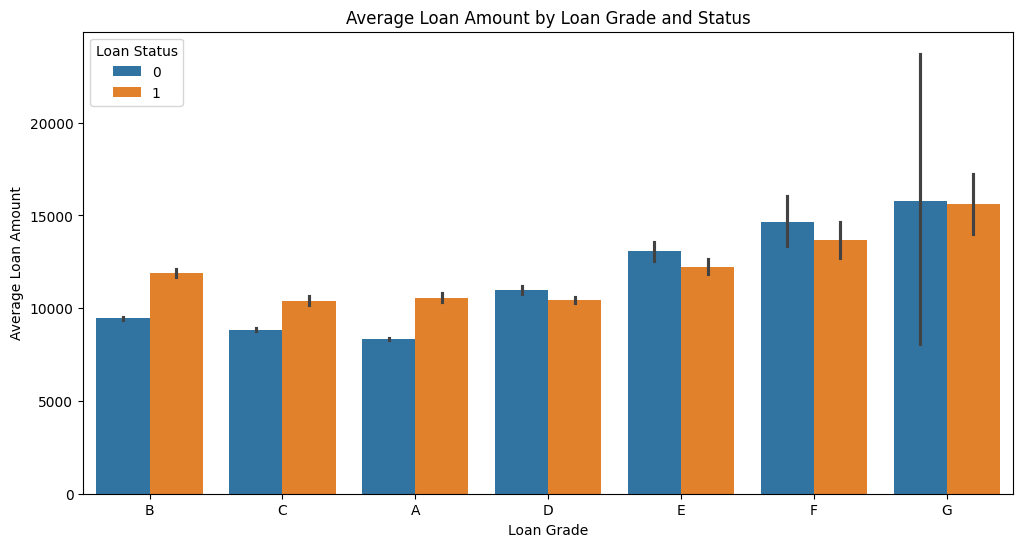

In [261]:
plt.figure(figsize=(12, 6))
sns.barplot(x='loan_grade', y='loan_amnt', hue='loan_status', data=df_train, estimator=np.mean)
plt.title('Average Loan Amount by Loan Grade and Status')
plt.xlabel('Loan Grade')
plt.ylabel('Average Loan Amount')
plt.legend(title='Loan Status')
plt.show()

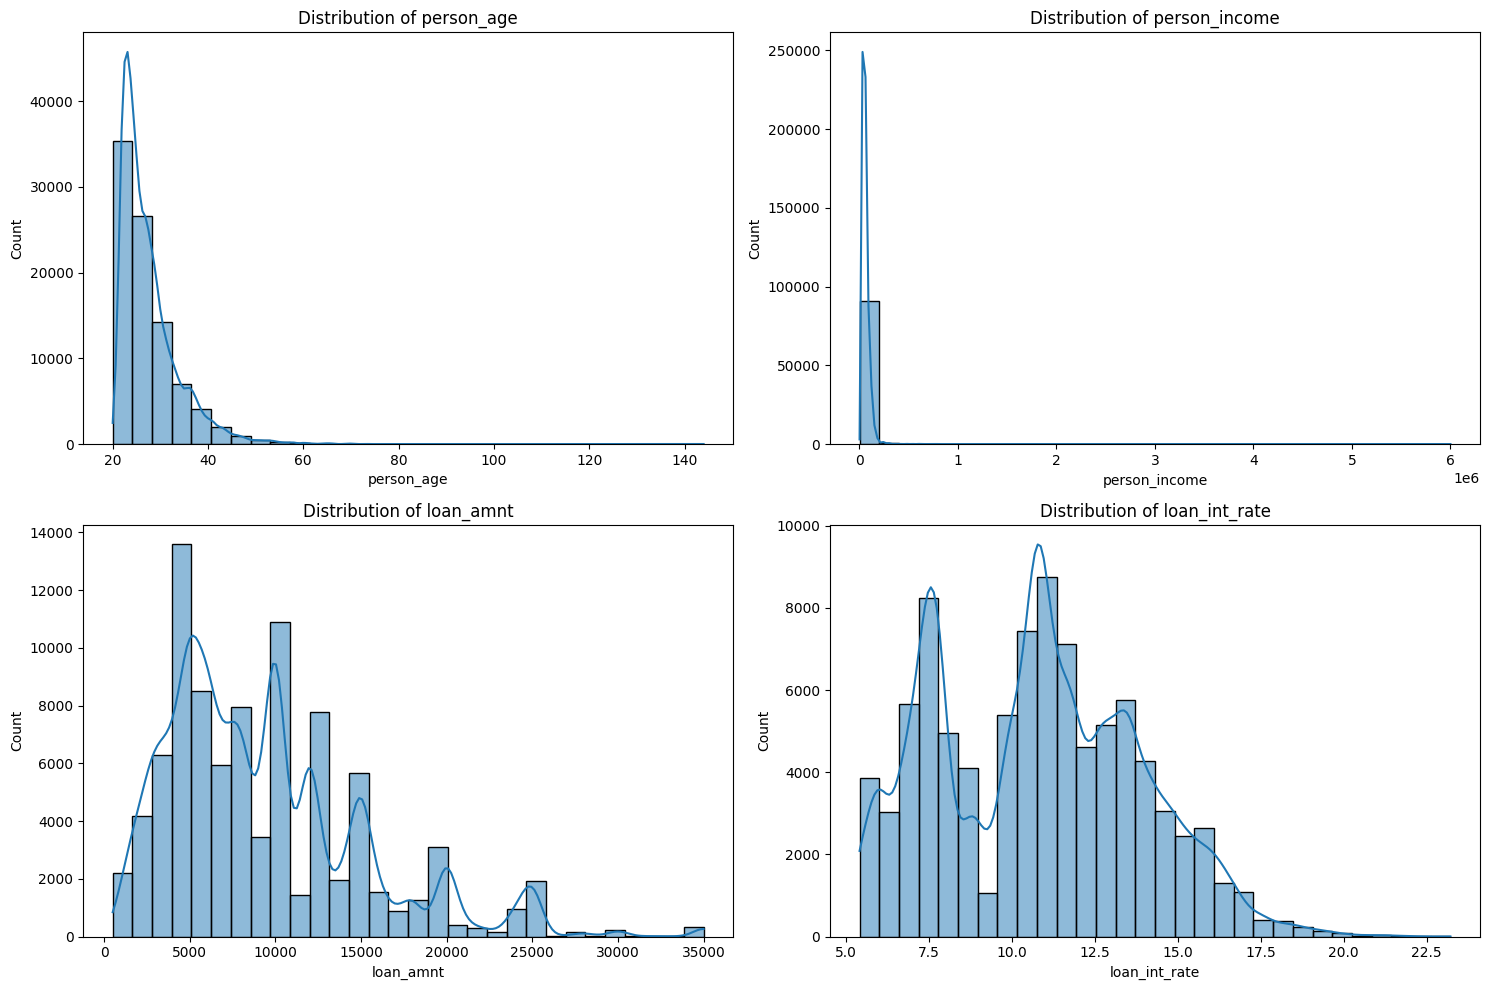

In [262]:
num_features = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_train[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

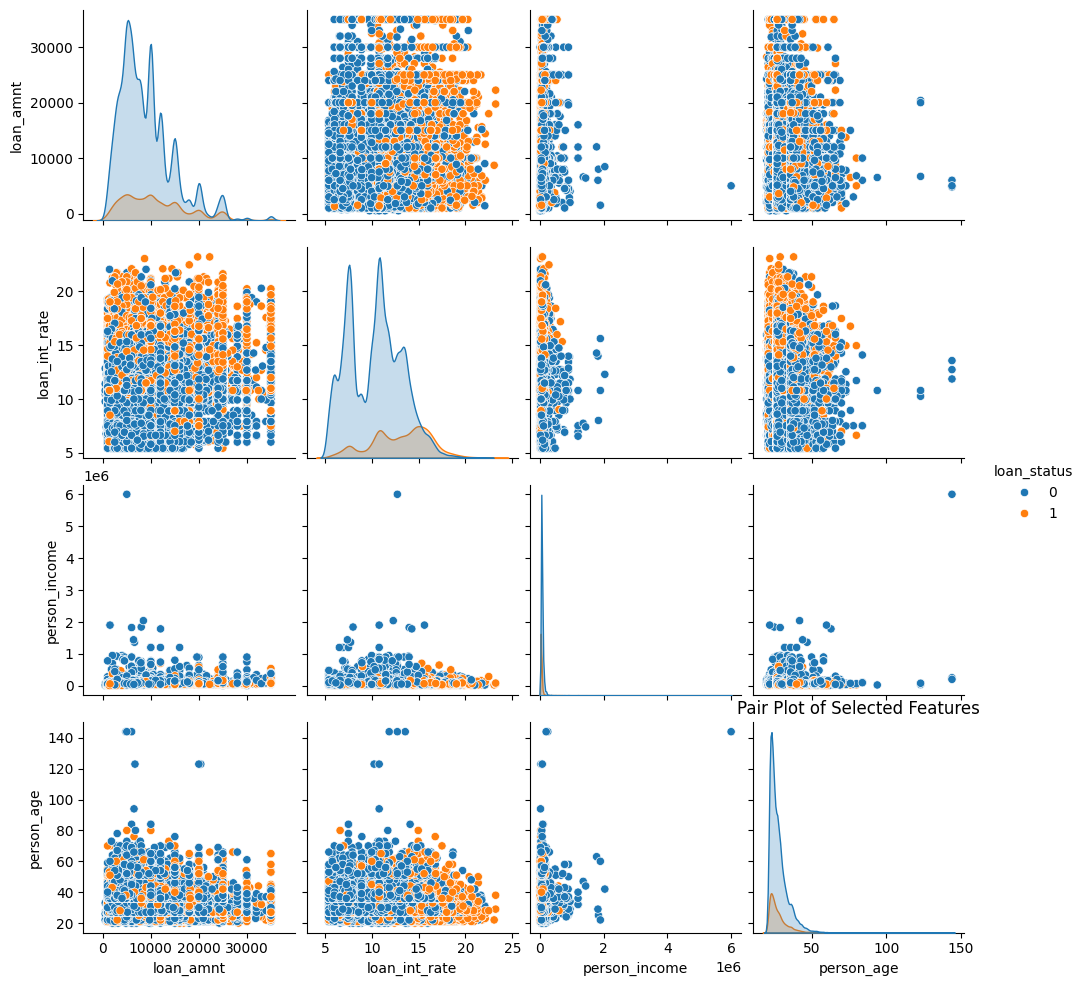

In [263]:
subset_features = ['loan_amnt', 'loan_int_rate', 'person_income', 'person_age', 'loan_status']
sns.pairplot(df_train[subset_features], hue='loan_status')
plt.title('Pair Plot of Selected Features')
plt.show()

In [264]:
from sklearn.preprocessing import LabelEncoder

def preprocess_data(df_train, df_test):  
    label_enc = LabelEncoder()   
    label_cols = ['person_home_ownership', 'loan_grade', 'cb_person_default_on_file']    
    for col in label_cols:
        df_train[col] = label_enc.fit_transform(df_train[col])
        df_test[col] = label_enc.transform(df_test[col])    
    df_train = pd.get_dummies(df_train, columns=['loan_intent'], drop_first=True)
    df_test = pd.get_dummies(df_test, columns=['loan_intent'], drop_first=True) 
    target_col = 'loan_status'
    train_columns = df_train.drop(columns=[target_col]).columns    
    df_test = df_test.reindex(columns=train_columns, fill_value=0)    
    return df_train, df_test

df_train_processed, df_test_processed = preprocess_data(df_train, df_test)

In [265]:
df_train = df_train_processed
df_test = df_test_processed

In [266]:
df_train.shape,df_test.shape


((91226, 16), (39098, 15))

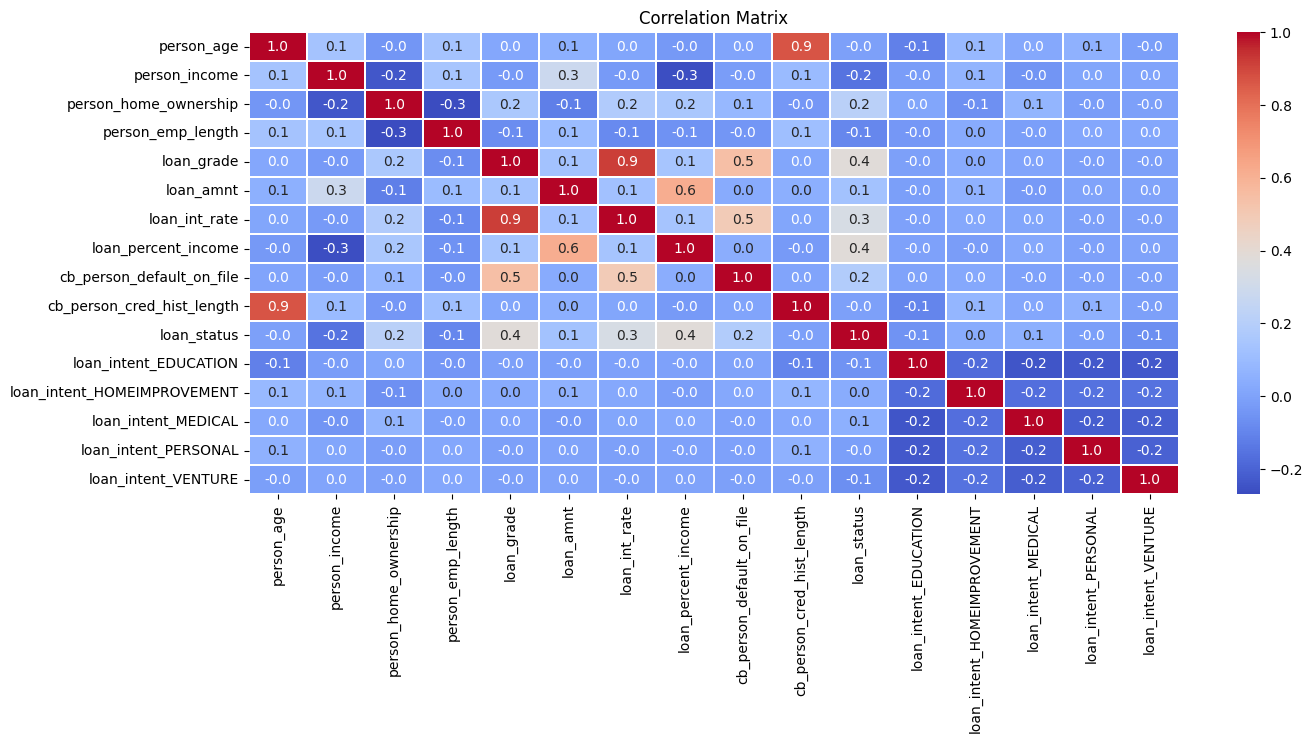

In [267]:
correlation_matrix = df_train.corr()
plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.2)
plt.title('Correlation Matrix')
plt.show()

## Summary

### Age and Credit History
- Older individuals tend to have longer credit histories, indicating a **strong positive correlation** between age and credit history.

### Loan Grade and Interest Rate
- **Higher loan grades** are strongly associated with **lower interest rates**, reflecting loan risk. Better loan grades signify lower risk and thus result in lower interest rates.

### Loan Amount and Income
- **Larger loan amounts** represent a higher percentage of the borrower’s income.
- **Higher-income** individuals tend to borrow larger amounts, indicating a trend between loan amounts and income levels.

### Loan Default
- **Loan Grade & Interest Rate**: Higher loan grades and interest rates are linked to a **greater likelihood of default**.
- **Credit History**: Borrowers with a history of default generally have **worse loan grades**.
- **Income & Employment**: Higher-income individuals and those with **longer employment histories** are less likely to default.
- **Income Proportion**: A higher percentage of income spent on loans increases the **risk of default**.

### Loan Intent
- Loan intents like **education** and **home improvement** show **negative correlations** with loan defaults, suggesting borrowers tend to focus on specific purposes for their loans.

### Conclusion
- Factors such as **age, income, loan grade, interest rate**, and **loan intent** are important predictors of loan behavior, particularly **default risk**. Understanding these relationships is essential for predicting loan outcomes.

# Regression Analysis

In [268]:
df_train.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_grade', 'loan_amnt', 'loan_int_rate',
       'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE'],
      dtype='object')

In [269]:
df_test.isnull().sum()


person_age                     0
person_income                  0
person_home_ownership          0
person_emp_length              0
loan_grade                     0
loan_amnt                      0
loan_int_rate                  0
loan_percent_income            0
cb_person_default_on_file      0
cb_person_cred_hist_length     0
loan_intent_EDUCATION          0
loan_intent_HOMEIMPROVEMENT    0
loan_intent_MEDICAL            0
loan_intent_PERSONAL           0
loan_intent_VENTURE            0
dtype: int64

In [270]:
def feature_engineering(df):
    
    df['loan_to_income_ratio'] = df['loan_amnt'] / df['person_income']  
    df['financial_burden'] = df['loan_amnt'] * df['loan_int_rate'] 
    df['income_per_year_emp'] = df['person_income'] / (df['person_emp_length'])
    df['cred_hist_to_age_ratio'] = df['cb_person_cred_hist_length'] / df['person_age']
    df['int_to_loan_ratio'] = df['loan_int_rate'] / df['loan_amnt']
    df['loan_int_emp_interaction'] = df['loan_int_rate'] * df['person_emp_length']
    df['debt_to_credit_ratio'] = df['loan_amnt'] / df['cb_person_cred_hist_length'] 
    df['int_to_cred_hist'] = df['loan_int_rate'] / df['cb_person_cred_hist_length']  
    df['int_per_year_emp'] = df['loan_int_rate'] / (df['person_emp_length'])
    df['loan_amt_per_emp_year'] = df['loan_amnt'] / (df['person_emp_length'])      
    df['income_to_loan_ratio'] = df['person_income'] / df['loan_amnt'] 
    
    return df

#median_income = df_train['person_income'].median()
df_train = feature_engineering(df_train)
df_test = feature_engineering(df_test)

In [271]:
y = df_train['loan_status'] 
df_train = df_train.drop(['loan_status'],axis=1)
X = df_train

In [272]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_train_data = df_train
scaled_test_data = df_test

In [273]:
# pip install lightgbm


In [274]:
from lightgbm import LGBMClassifier, early_stopping, log_evaluation
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.metrics import roc_auc_score

lgb_params = {
    'objective': 'binary',
    'n_estimators': 3000,
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'random_state': 42,
    'learning_rate': 0.0322942967545754,
    'num_leaves': 24,
    'max_depth': 15,
    'min_data_in_leaf': 25,  
    'feature_fraction': 0.6236144085285287, 
    'bagging_fraction': 0.9596685778433888, 
    'bagging_freq': 3,  
    'verbose': -1
}

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

lgbm_predictions = np.zeros(len(scaled_train_data))
lgbm_true_labels = np.zeros(len(scaled_train_data))
lgbm_test_predictions = np.zeros(len(scaled_test_data))

for fold, (train_idx, val_idx) in enumerate(skf.split(scaled_train_data, y)):
    X_train, X_val = scaled_train_data.iloc[train_idx], scaled_train_data.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]    
   
    lgbm_model = LGBMClassifier(**lgb_params)
    
    # Using callbacks for early stopping and logging
    lgbm_model.fit(X_train, y_train,
                   eval_set=[(X_val, y_val)],
                   eval_metric='auc',
                   callbacks=[early_stopping(stopping_rounds=10), log_evaluation(10)])

    lgbm_fold_preds = lgbm_model.predict_proba(X_val)[:, 1]  
    lgbm_fold_test_preds = lgbm_model.predict_proba(scaled_test_data)[:, 1]   
    lgbm_predictions[val_idx] = lgbm_fold_preds
    lgbm_true_labels[val_idx] = y_val    
    lgbm_test_predictions += lgbm_fold_test_preds / n_splits

overall_metric_lgbm = roc_auc_score(lgbm_true_labels, lgbm_predictions)
print("Overall AUC (LGBMClassifier with StratifiedKFold):", overall_metric_lgbm)


Training until validation scores don't improve for 10 rounds
[10]	valid_0's auc: 0.917424	valid_0's binary_logloss: 0.348813
[20]	valid_0's auc: 0.921477	valid_0's binary_logloss: 0.295796
[30]	valid_0's auc: 0.926658	valid_0's binary_logloss: 0.264607
[40]	valid_0's auc: 0.928745	valid_0's binary_logloss: 0.243278
[50]	valid_0's auc: 0.930584	valid_0's binary_logloss: 0.228003
[60]	valid_0's auc: 0.933773	valid_0's binary_logloss: 0.216769
[70]	valid_0's auc: 0.935855	valid_0's binary_logloss: 0.206697
[80]	valid_0's auc: 0.938726	valid_0's binary_logloss: 0.199383
[90]	valid_0's auc: 0.94022	valid_0's binary_logloss: 0.193636
[100]	valid_0's auc: 0.941773	valid_0's binary_logloss: 0.188828
[110]	valid_0's auc: 0.943824	valid_0's binary_logloss: 0.184815
[120]	valid_0's auc: 0.945896	valid_0's binary_logloss: 0.181385
[130]	valid_0's auc: 0.947346	valid_0's binary_logloss: 0.17855
[140]	valid_0's auc: 0.947994	valid_0's binary_logloss: 0.176798
[150]	valid_0's auc: 0.948713	valid_0's 

In [275]:
catboost_params = {
    'depth': 7,
    'learning_rate': 0.19893301995319765,
    'bagging_temperature': 0.7979373495258176,
    'l2_leaf_reg': 5,
    'loss_function': 'Logloss',
    'iterations': 400,
    'grow_policy': 'Lossguide',
    'eval_metric': 'AUC',
}

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

catboost_predictions = np.zeros(len(scaled_train_data))
catboost_true_labels = np.zeros(len(scaled_train_data))
catboost_test_predictions = np.zeros(len(scaled_test_data))

for fold, (train_idx, val_idx) in enumerate(skf.split(scaled_train_data, y)):
    X_train, X_val = scaled_train_data.iloc[train_idx], scaled_train_data.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    catboost_model = CatBoostClassifier(**catboost_params)
    catboost_model.fit(X_train, y_train,
                       eval_set=(X_val, y_val),
                       early_stopping_rounds=10,
                       verbose=True)
  
    catboost_fold_preds = catboost_model.predict_proba(X_val)[:, 1]  
    catboost_fold_test_preds = catboost_model.predict_proba(scaled_test_data)[:, 1]  
    catboost_predictions[val_idx] = catboost_fold_preds
    catboost_true_labels[val_idx] = y_val    
    catboost_test_predictions += catboost_fold_test_preds / n_splits
overall_metric_catboost = roc_auc_score(catboost_true_labels, catboost_predictions)
print("Overall AUC (CatBoostClassifier with StratifiedKFold):", overall_metric_catboost)

0:	test: 0.8511688	best: 0.8511688 (0)	total: 33.5ms	remaining: 13.4s
1:	test: 0.8578288	best: 0.8578288 (1)	total: 68.7ms	remaining: 13.7s
2:	test: 0.8798502	best: 0.8798502 (2)	total: 102ms	remaining: 13.5s
3:	test: 0.8988666	best: 0.8988666 (3)	total: 138ms	remaining: 13.7s
4:	test: 0.9066845	best: 0.9066845 (4)	total: 175ms	remaining: 13.8s
5:	test: 0.9155118	best: 0.9155118 (5)	total: 211ms	remaining: 13.9s
6:	test: 0.9158664	best: 0.9158664 (6)	total: 245ms	remaining: 13.8s
7:	test: 0.9249141	best: 0.9249141 (7)	total: 283ms	remaining: 13.9s
8:	test: 0.9259767	best: 0.9259767 (8)	total: 322ms	remaining: 14s
9:	test: 0.9298488	best: 0.9298488 (9)	total: 358ms	remaining: 14s
10:	test: 0.9312738	best: 0.9312738 (10)	total: 397ms	remaining: 14s
11:	test: 0.9326235	best: 0.9326235 (11)	total: 433ms	remaining: 14s
12:	test: 0.9328330	best: 0.9328330 (12)	total: 471ms	remaining: 14s
13:	test: 0.9348778	best: 0.9348778 (13)	total: 515ms	remaining: 14.2s
14:	test: 0.9371712	best: 0.937171

## Plots from result for lightbm

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

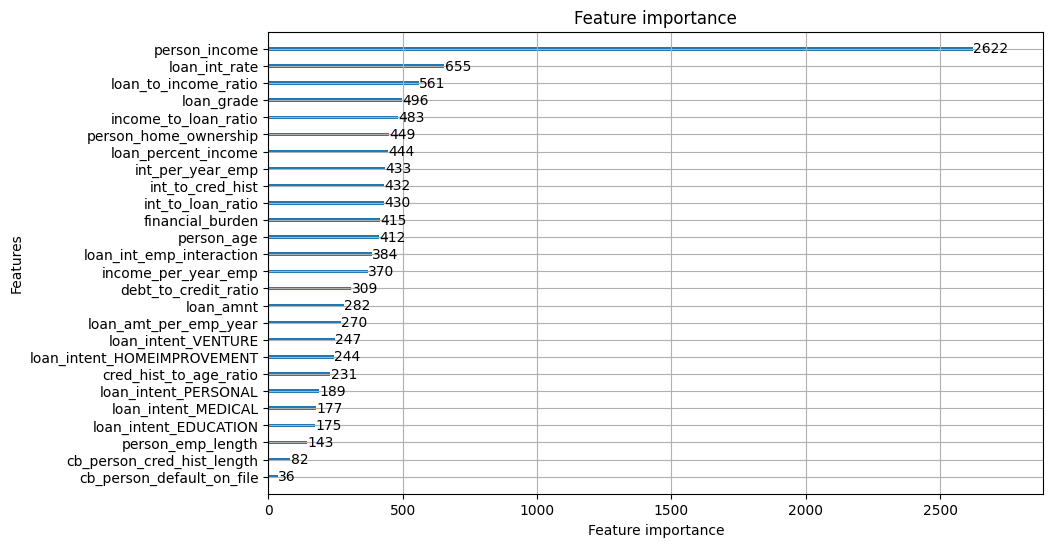

In [276]:
from lightgbm import plot_importance
plot_importance(lgbm_model,figsize=(10, 6))

In [277]:
lgbm_model


LGBMClassifier(bagging_fraction=0.9596685778433888, bagging_freq=3,
               feature_fraction=0.6236144085285287,
               learning_rate=0.0322942967545754, max_depth=15,
               metric='binary_logloss', min_data_in_leaf=25, n_estimators=3000,
               num_leaves=24, objective='binary', random_state=42, verbose=-1)

In [278]:
# pip install lime


Defaulting to user installation because normal site-packages is not writeable


In [279]:
import lime
import lime.lime_tabular

In [280]:
df_train.shape


(91226, 26)

In [281]:
df_train.head()


person_age  person_income  person_home_ownership  person_emp_length  \
0          37          35000                      3                0.0   
1          22          56000                      2                6.0   
2          29          28800                      2                8.0   
3          30          70000                      3               14.0   
4          22          60000                      3                2.0   

   loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0           1       6000          11.49                 0.17   
1           2       4000          13.35                 0.07   
2           0       6000           8.90                 0.21   
3           1      12000          11.11                 0.17   
4           0       6000           6.92                 0.10   

   cb_person_default_on_file  cb_person_cred_hist_length  ...  \
0                          0                          14  ...   
1                          0                           2  ...   
2                          0                          10  ...   
3                          0                           5  ...   
4                          0                           3  ...   

   financial_burden  income_per_year_emp  cred_hist_to_age_ratio  \
0           68940.0                  inf                0.378378   
1           53400.0         9.333333e+03                0.090909   
2           53400.0         3.600000e+03                0.344828   
3          133320.0         5.000000e+03                0.166667   
4           41520.0         3.000000e+04                0.136364   

   int_to_loan_ratio  loan_int_emp_interaction  debt_to_credit_ratio  \
0           0.001915                      0.00            428.571429   
1           0.003337                     80.10           2000.000000   
2           0.001483                     71.20            600.000000   
3           0.000926                    155.54           2400.000000   
4           0.001153                     13.84           2000.000000   

   int_to_cred_hist  int_per_year_emp  loan_amt_per_emp_year  \
0          0.820714               inf                    inf   
1          6.675000          2.225000             666.666667   
2          0.890000          1.112500             750.000000   
3          2.222000          0.793571             857.142857   
4          2.306667          3.460000            3000.000000   

   income_to_loan_ratio  
0              5.833333  
1             14.000000  
2              4.800000  
3              5.833333  
4             10.000000  

[5 rows x 26 columns]

In [282]:
df_test.shape


(39098, 26)

In [283]:
df_train.replace([np.inf, -np.inf], np.nan, inplace=True)
df_train.fillna(df_train.mean(), inplace=True)
print("DataFrame after replacing inf with column means:")
df_train.head()

DataFrame after replacing inf with column means:


person_age  person_income  person_home_ownership  person_emp_length  \
0          37          35000                      3                0.0   
1          22          56000                      2                6.0   
2          29          28800                      2                8.0   
3          30          70000                      3               14.0   
4          22          60000                      3                2.0   

   loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0           1       6000          11.49                 0.17   
1           2       4000          13.35                 0.07   
2           0       6000           8.90                 0.21   
3           1      12000          11.11                 0.17   
4           0       6000           6.92                 0.10   

   cb_person_default_on_file  cb_person_cred_hist_length  ...  \
0                          0                          14  ...   
1                          0                           2  ...   
2                          0                          10  ...   
3                          0                           5  ...   
4                          0                           3  ...   

   financial_burden  income_per_year_emp  cred_hist_to_age_ratio  \
0           68940.0         19519.454848                0.378378   
1           53400.0          9333.333333                0.090909   
2           53400.0          3600.000000                0.344828   
3          133320.0          5000.000000                0.166667   
4           41520.0         30000.000000                0.136364   

   int_to_loan_ratio  loan_int_emp_interaction  debt_to_credit_ratio  \
0           0.001915                      0.00            428.571429   
1           0.003337                     80.10           2000.000000   
2           0.001483                     71.20            600.000000   
3           0.000926                    155.54           2400.000000   
4           0.001153                     13.84           2000.000000   

   int_to_cred_hist  int_per_year_emp  loan_amt_per_emp_year  \
0          0.820714          3.451274            2878.295562   
1          6.675000          2.225000             666.666667   
2          0.890000          1.112500             750.000000   
3          2.222000          0.793571             857.142857   
4          2.306667          3.460000            3000.000000   

   income_to_loan_ratio  
0              5.833333  
1             14.000000  
2              4.800000  
3              5.833333  
4             10.000000  

[5 rows x 26 columns]

In [284]:
df_test.replace([np.inf, -np.inf], np.nan, inplace=True)
df_test.fillna(df_test.mean(), inplace=True)
print("DataFrame after replacing inf with column means:")
df_test.head()

DataFrame after replacing inf with column means:


person_age  person_income  person_home_ownership  person_emp_length  \
0          23          69000                      3                3.0   
1          26          96000                      0                6.0   
2          26          30000                      3                5.0   
3          33          50000                      3                4.0   
4          26         102000                      0                8.0   

   loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0           5      25000          15.76                 0.36   
1           2      10000          12.68                 0.10   
2           4       4000          17.19                 0.13   
3           0       7000           8.90                 0.14   
4           3      15000          16.32                 0.15   

   cb_person_default_on_file  cb_person_cred_hist_length  ...  \
0                          0                           2  ...   
1                          1                           4  ...   
2                          1                           2  ...   
3                          0                           7  ...   
4                          1                           4  ...   

   financial_burden  income_per_year_emp  cred_hist_to_age_ratio  \
0          394000.0              23000.0                0.086957   
1          126800.0              16000.0                0.153846   
2           68760.0               6000.0                0.076923   
3           62300.0              12500.0                0.212121   
4          244800.0              12750.0                0.153846   

   int_to_loan_ratio  loan_int_emp_interaction  debt_to_credit_ratio  \
0           0.000630                     47.28               12500.0   
1           0.001268                     76.08                2500.0   
2           0.004298                     85.95                2000.0   
3           0.001271                     35.60                1000.0   
4           0.001088                    130.56                3750.0   

   int_to_cred_hist  int_per_year_emp  loan_amt_per_emp_year  \
0          7.880000          5.253333            8333.333333   
1          3.170000          2.113333            1666.666667   
2          8.595000          3.438000             800.000000   
3          1.271429          2.225000            1750.000000   
4          4.080000          2.040000            1875.000000   

   income_to_loan_ratio  
0              2.760000  
1              9.600000  
2              7.500000  
3              7.142857  
4              6.800000  

[5 rows x 26 columns]

In [285]:
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.fillna(X_train.mean(), inplace=True)
X = X_train.values
explainer = lime.lime_tabular.LimeTabularExplainer(X, 
                                                   feature_names=X_train.columns, 
                                                   class_names=['0', '1'], 
                                                   kernel_width=5)

C:\Users\abudh\AppData\Local\Temp\ipykernel_18696\1230043500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\abudh\AppData\Local\Temp\ipykernel_18696\1230043500.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


In [286]:
redict_fn_lgb = lambda x: lgbm_model.predict_proba(x).astype(float)
#X = X_train.values
#explainer = lime.lime_tabular.LimeTabularExplainer(X,feature_names = X_train.columns,class_names=['0','1'],kernel_width=5)

In [287]:
choosen_instance = X_val.loc[[32558]].values[0]
exp = explainer.explain_instance(choosen_instance, redict_fn_lgb,num_features=15)
exp.show_in_notebook(show_all=False)

In [288]:
choosen_instance = X_val.loc[[32562]].values[0]
exp = explainer.explain_instance(choosen_instance, redict_fn_lgb,num_features=15)
exp.show_in_notebook(show_all=False)

In [289]:
choosen_instance = X_val.loc[[25]].values[0]
exp = explainer.explain_instance(choosen_instance, redict_fn_lgb,num_features=15)
exp.show_in_notebook(show_all=False)

In [290]:
choosen_instance = X_val.loc[[10]].values[0]
exp = explainer.explain_instance(choosen_instance, redict_fn_lgb,num_features=15)
exp.show_in_notebook(show_all=False)

In [291]:
df_sub.head()


id  loan_status
0  58645          0.5
1  58646          0.5
2  58647          0.5
3  58648          0.5
4  58649          0.5

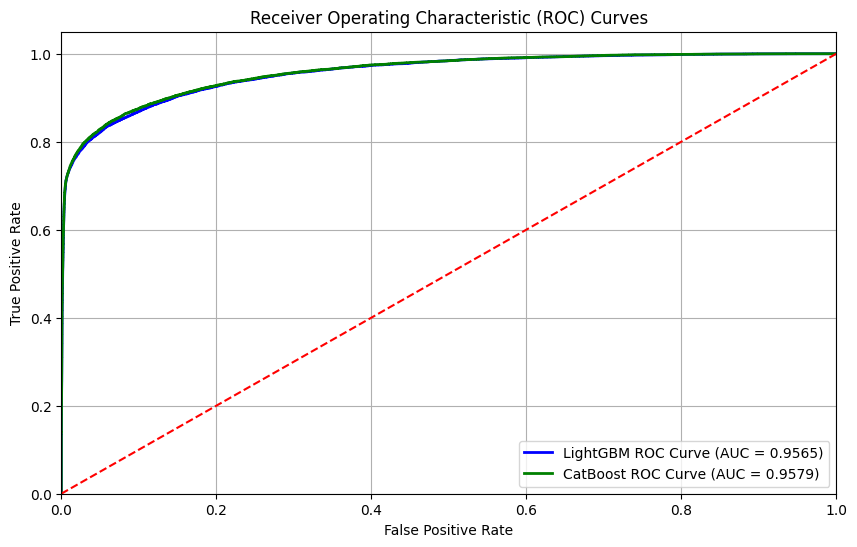

In [292]:
from sklearn.metrics import roc_curve, auc
fpr_lgbm, tpr_lgbm, _ = roc_curve(lgbm_true_labels, lgbm_predictions)
roc_auc_lgbm = auc(fpr_lgbm, tpr_lgbm)

fpr_catboost, tpr_catboost, _ = roc_curve(catboost_true_labels, catboost_predictions)
roc_auc_catboost = auc(fpr_catboost, tpr_catboost)

plt.figure(figsize=(10, 6))
plt.plot(fpr_lgbm, tpr_lgbm, color='blue', lw=2, label=f'LightGBM ROC Curve (AUC = {roc_auc_lgbm:.4f})')
plt.plot(fpr_catboost, tpr_catboost, color='green', lw=2, label=f'CatBoost ROC Curve (AUC = {roc_auc_catboost:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [293]:
df_sub['loan_status'] = lgbm_test_predictions*0.2 + catboost_test_predictions*0.8 #+ xgb_test_predictions*0.0


In [294]:
df_sub.head()


id  loan_status
0  58645     0.998964
1  58646     0.035571
2  58647     0.556119
3  58648     0.012869
4  58649     0.063045

In [295]:
df_sub.to_csv('submission.csv', index=False)
